In [1]:
%pylab inline 
import numpy as np
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Analytical calculations of the effect of ionic strength on the various 
# inorganic carbon equilibria in solution. For comparison with empirical
# determinations below. 
dG0_H2O = -237.2 # kJ/mol
R = 8.31e-3 # kJ/(K*mol)
T = 298.15 # K

# Standard formation energies for every specie. Data from Alberty (2003). 
Alberty = {'CO2(g)':    {'nH':0, 'z':0,  'dG0_f': -394.36},
           'CO2(sp)':   {'nH':0, 'z':0,  'dG0_f': -385.97},
           'CO2(aq)':   {'nH':2, 'z':0,  'dG0_f': -385.97 - 237.13},
           'H2O(l)':    {'nH':2, 'z':0,  'dG0_f': -237.13},
           'H2CO3(sp)': {'nH':2, 'z':0,  'dG0_f': -606.33},
           'HCO3-(sp)': {'nH':1, 'z':-1, 'dG0_f': -586.77},
           'CO3-2(sp)': {'nH':0, 'z':-2, 'dG0_f': -527.81}}

# Pretty LaTeX style names for captions. 
PrettyNames = {'CO2(g)': r'$CO_2 Gas$',
               'CO2(sp)': r'$Aqueous CO_2$',
               'CO2(aq)': r'$Aqueous CO_2 + H_2O$',
               'H2O(l)': r'$H_20$',
               'H2CO3(sp)': r'$H_2CO_3$',
               'HCO3-(sp)': r'$HCO_3^-$',
               'CO3-2(sp)': r'$CO_3^{2-}$'}

# Mapping of KEGG IDs to protonation states of particular chemical species.
# Protonations states (AKA pseudoisomers) assumed to be in equilibrium with pH.
KEGG2sp = {'C00288': ['H2CO3(sp)', 'HCO3-(sp)', 'CO3-2(sp)'], # H_total
           'C00001': ['H2O(l)'],
           'C00011': ['CO2(sp)'],
           'C99998': ['CO2(aq)']} # False KEGG ID for CO2 + H2O

# Extended Debye-Huckel correction.
# Approximation of the temperature dependency of ionic strength effects
DH_alpha = 1e-3*(9.20483*T) - 1e-5*(1.284668 * T**2) + 1e-8*(4.95199 * T**3)
DH_beta = 1.6
def debye_huckel(I):
    """Approximation of the temperature dependency of ionic strength effects."""
    return DH_alpha * I**(0.5) / (1.0 + DH_beta * I**(0.5))

In [3]:
# Fetch data for each of the 4 species. 
h2co3_d   = Alberty['H2CO3(sp)']
hco3_d    = Alberty['HCO3-(sp)']
co3_d     = Alberty['CO3-2(sp)']
co2aq_d   = Alberty['CO2(aq)']
dGf_h2co3 = h2co3_d['dG0_f']
dGf_hco3  = hco3_d['dG0_f']
dGf_co3   = co3_d['dG0_f']
dGf_co2aq = co2aq_d['dG0_f']

# Calculate the pKas from dGf with DH correction for ionic strength from I = 0.0 to I = 1.2 M. 
# Note that DH only supposed to be reasonable up to I = 0.2
I_DH = np.arange(0.0, 1.2, 0.01)
DH = debye_huckel(I_DH)
dGf_h2co3_I = dGf_h2co3 + h2co3_d['nH'] * DH - h2co3_d['z']**2 * DH  # nH = 2, z = 0
dGf_hco3_I  = dGf_hco3  + hco3_d['nH']  * DH - hco3_d['z'] **2 * DH  # nH = 1, z = -1
dGf_co3_I   = dGf_co3   + co3_d['nH']   * DH - co3_d['z']  **2 * DH  # nH = 0, z = -2
dGf_co2aq_I = dGf_co2aq + co2aq_d['nH'] * DH - co2aq_d['z']**2 * DH  # nH = 0, z = 0

# In nomenclature of Roy and Millero papers, the H2CO3/HCO3- pKa is not mentioned. I call it pK0 here. 
pK0_DH = (dGf_hco3_I - dGf_h2co3_I) / (R*T*log(10))
pK1_DH = (dGf_hco3_I - dGf_co2aq_I) / (R*T*log(10))
pK2_DH = (dGf_co3_I - dGf_hco3_I) / (R*T*log(10))

Formulae for $pK_1$ - the effective dissociation constant of aqueous $CO_2$ to $HCO_3^-$ from the literature. These are empyrical formulae, derived by regressing against measured data. 

For a review of these various empyrical regressions, see:

Millero, F. J. (1995). Thermodynamics of the carbon dioxide system in the oceans. Geochim. Cosmochim. Acta 59, 661–677.

Millero highlights some measurements as being better than others, so I focus here on those. I am graphing functional forms derived from the following references:

1. Goyet, C., and Poisson, A. (1989). New determination of carbonic acid dissociation constants in seawater as a function of temperature and salinity. Deep Sea Res. Part A. Oceanogr. Res. Pap. 36, 1635–1654.
2. Roy, R. N., Roy, L. N., Vogel, K. M., Porter-Moore, C., Pearson, T., Good, C. E., Millero, F. J., and Campbell, D. M. (1993). The dissociation constants of carbonic acid in seawater at salinities 5 to 45 and temperatures 0 to 45°C. Mar. Chem. 44, 249–267. (Erratum 1996)

Typical salinity values for seawater and freshwater are ~35 psu and 0-5 psu (0.32 psu characteristic) respectively, as described in the following references: 

1. Bœuf, G., and Payan, P. (2001). How should salinity influence fish growth? Comp. Biochem. Physiol. - C Toxicol. Pharmacol. 130, 411–423.
2. Lee, C. E., and Bell, M. a. (1999). Causes and consequences of recent freshwater invasions by saltwater animals. Trends Ecol. Evol. 14, 284–288.

In [4]:
def pK1_GP(S, T): 
    """From Goyet & Poisson 1989."""
    ret = 807.18/T
    ret += 3.374 
    ret -= 0.00175*S*np.log(T)
    ret += 0.000095*S**2
    return ret

def pK1_roy(S,T):
    """Valid only down to S = 5.
    
    S = 5 is the lowest value Roy et al. measured, so it is the lowest
    value that can be fit.
    
    Equation 28 from From Roy et al., Marine Chemistry 1993.
    """
    lnK1 = 2.83655 - 2307.1266/T - 1.5529413 * np.log(T)
    lnK1 += (-0.20760841 - 4.0484/T)*np.sqrt(S)
    lnK1 += 0.0846834*S - 0.00654208*S**1.5 
    return - lnK1 / np.log(10)

def pK1_roy_full(S,T):
    """Full expression projecting back to 0 salinity.
    
    Equation 34 from correction of Roy et al., Marine Chemistry 1993.
    Correction issued in 1996. Make sure to use corrected version.
    """
    lnK1 = 290.9097 - 14554.21/T - 45.0575 * np.log(T)
    lnK1 += ((-228.39774 + 9714.36839/T + 34.485796*np.log(T))*np.sqrt(S))
    lnK1 += ((54.20871 - 2310.48919/T - 8.19515 * np.log(T))*S)
    lnK1 += ((-3.969101 + 170.22169/T + 0.603627 * np.log(T))*S**1.5)
    lnK1 -= (0.00258768*(S**2))
    return - lnK1 / np.log(10)

def pK1_pure_water(T):
    """Expression for pure water, from Millero 1979 as cited by Roy 1993."""
    lnK1 = 290.9097 - 14554.21/T - 45.0575 * np.log(T)
    return - lnK1 / np.log(10)

In [5]:
S = np.arange(0, 50, 0.1)
I = 0.0199183*S/(1 - 0.001002*S)
T = 25 + 273.15
pK1s_GP = pK1_GP(S, T)
pK1s_roy = pK1_roy(S, T)
pK1s_roy_full = pK1_roy_full(S, T)
pK1_water_25 = pK1_pure_water(T)

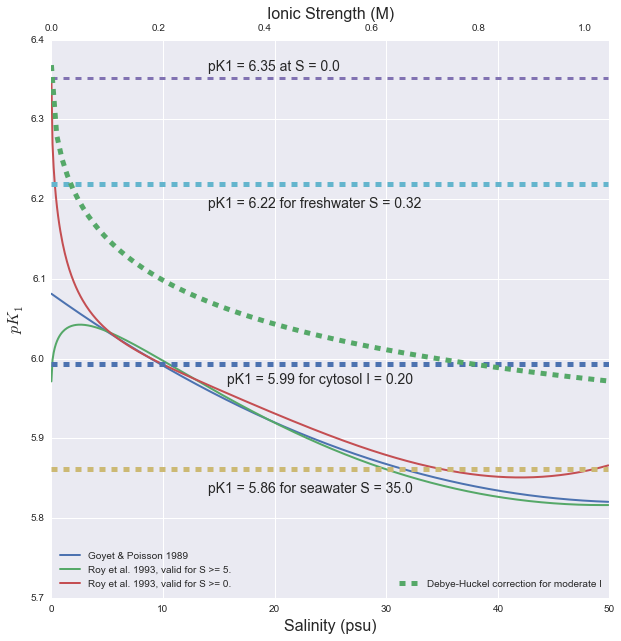

In [6]:
pylab.figure(figsize=(10,10))
pylab.plot(S, pK1s_GP, label='Goyet & Poisson 1989', lw=2)
pylab.plot(S, pK1s_roy, label='Roy et al. 1993, valid for S >= 5.', lw=2)
pylab.plot(S, pK1s_roy_full, label='Roy et al. 1993, valid for S >= 0.', lw=2)

pylab.plot(S, np.ones(S.size)*pK1_water_25, '--', lw=3)
pylab.text(14, pK1_water_25 + 0.01,
           'pK1 = %.3g at S = 0.0' % pK1_water_25,
            fontsize=14)

seawater_S = 35
idx_sea = np.where(S < seawater_S)[0][-1]
pK1_sea = pK1s_roy_full[idx_sea]

freshwater_S = 0.32
idx_fresh = np.where(S < freshwater_S)[0][-1]
pK1_fresh = pK1s_roy_full[idx_fresh]

pylab.plot(S, np.ones(S.size)*pK1_sea, '--', lw=5)
pylab.text(14, pK1_sea - 0.03,
           'pK1 = %.3g for seawater S = %.1f' % (pK1_sea, seawater_S),
            fontsize=14)

pylab.plot(S, np.ones(S.size)*pK1_fresh, '--', lw=5)
pylab.text(14, pK1_fresh - 0.03,
           'pK1 = %.3g for freshwater S = %.2f' % (pK1_fresh, freshwater_S),
            fontsize=14)

pylab.xlabel('Salinity (psu)', fontsize=16)
pylab.ylabel('$pK_1$', fontsize=16)
pylab.legend(loc=3)

pylab.twiny()
cell_S = 0.2
idx_cell = np.where(I < cell_S)[0][-1]
pK1_cell = pK1s_roy_full[idx_cell]

pylab.xlim(I.min(), I.max())
pylab.xlabel('Ionic Strength (M)', fontsize=16)
pylab.plot(I, np.ones(I.size)*pK1_cell, '--', lw=5)
pylab.plot(I_DH, pK1_DH, '--', lw=5, label='Debye-Huckel correction for moderate I')
pylab.text(0.33, pK1_cell - 0.025,
           'pK1 = %.3g for cytosol I = %.2f' % (pK1_cell, cell_S),
           fontsize=14)
pylab.legend(loc=4)
pylab.grid(b=False)
pylab.ylim(5.7, 6.4)
pylab.show()

Formulae for $pK_2$ - the dissociation constant $HCO_3^-$ to $CO_3^{2-}$ from the literature. These are empyrical formulae, derived by regressing against measured data as above. References are the same. 

In [7]:
def pK2_GP(S, T): 
    """From Goyet & Poisson 1989, adapted by Millero 1995."""
    ret = 1486.6/T + 4.491
    ret += (-0.00412*S*np.log(T))
    ret += 0.000215*S**2
    return ret

def pK2_roy(S,T):
    """Valid only down to S = 5.
    
    S = 5 is the lowest value Roy et al. measured, so it is the lowest
    value that can be fit.    
    """
    lnK2 = -9.226508 - 3351.6106/T - 0.2005743 * np.log(T)
    lnK2 += (-0.106901773 - 23.9722/T)*np.sqrt(S)
    lnK2 += 0.1130822 * S - 0.00846934 * S**1.5
    return - lnK2 / np.log(10)

def pK2_roy_full(S,T):
    """Full expression projecting back to 0 salinity."""
    lnK2 = 207.6548 - 11843.79/T - 33.6485 * np.log(T)
    lnK2 += (-167.69908 + 6551.35253/T + 25.928788 * np.log(T)) * np.sqrt(S)
    lnK2 += (39.75854 - 1566.13883/T - 6.171951 * np.log(T)) * S
    lnK2 += (-2.892532 + 116.270079/T + 0.45788501 * np.log(T))*S**1.5
    lnK2 -= 0.00613142 * S**2
    return - lnK2 / np.log(10)

def pK2_pure_water(T):
    """Expression for pure water, from Millero 1979 as cited by Roy 1993."""
    lnK2 = 207.6548 - 11843.79/T- 33.6485*np.log(T)
    return - lnK2 / np.log(10)

In [8]:
S = np.arange(0, 50, 0.1)
I = 0.0199183*S/(1 - 0.001002*S)
T = 25 + 273.15
pK2s_GP = pK2_GP(S, T)
pK2s_roy = pK2_roy(S, T)
pK2s_roy_full = pK2_roy_full(S, T)
pK2_water_25 = pK2_pure_water(T)

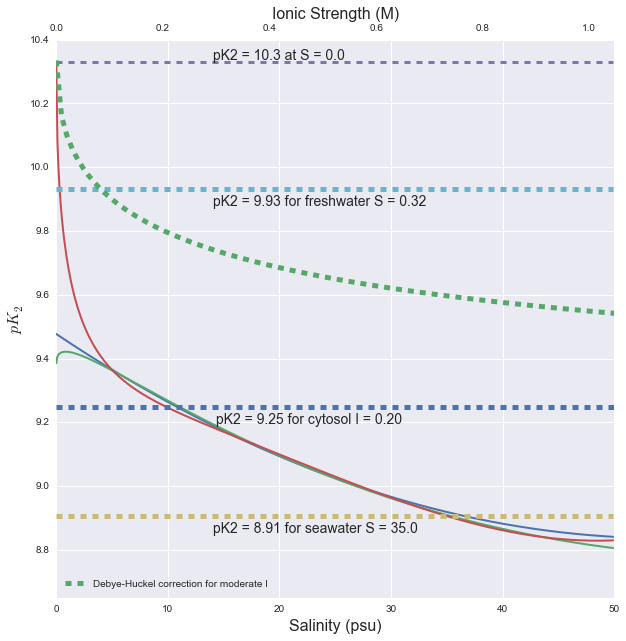

In [9]:
pylab.figure(figsize=(10,10))
pylab.plot(S, pK2s_GP, label='Goyet & Poisson 1989', lw=2)
pylab.plot(S, pK2s_roy, label='Roy et al. 1993, valid for S >= 5.', lw=2)
pylab.plot(S, pK2s_roy_full, label='Roy et al. 1993, valid for S >= 0.', lw=2)
pylab.plot(S, np.ones(S.size)*pK2_water_25, '--', lw=3)
pylab.text(14, pK2_water_25 + 0.01,
           'pK2 = %.3g at S = 0.0' % pK2_water_25,
            fontsize=14)

seawater_S = 35
idx_sea = np.where(S <= seawater_S)[0][-1]
pK2_sea = pK2s_roy_full[idx_sea]

freshwater_S = 0.32
idx_fresh = np.where(S <= freshwater_S)[0][-1]
pK2_fresh = pK2s_roy_full[idx_fresh]

pylab.plot(S, np.ones(S.size)*pK2_sea, '--', lw=5)
pylab.text(14, pK2_sea - 0.05,
           'pK2 = %.3g for seawater S = %.1f' % (pK2_sea, seawater_S),
            fontsize=14)

pylab.plot(S, np.ones(S.size)*pK2_fresh, '--', lw=5)
pylab.text(14, pK2_fresh - 0.05,
           'pK2 = %.3g for freshwater S = %.2f' % (pK2_fresh, freshwater_S),
            fontsize=14)

pylab.xlabel('Salinity (psu)', fontsize=16)
pylab.ylabel('$pK_2$', fontsize=16)

pylab.twiny()
cell_S = 0.2
idx_cell = np.where(I <= cell_S)[0][-1]
pK2_cell = pK2s_roy_full[idx_cell]

pylab.xlim(I.min(), I.max())
pylab.xlabel('Ionic Strength (M)', fontsize=16)
pylab.plot(I, np.ones(I.size)*pK2_cell, '--', lw=5)
pylab.plot(I_DH, pK2_DH, '--', lw=5, label='Debye-Huckel correction for moderate I')
pylab.text(0.3, pK2_cell - 0.05,
           'pK2 = %.3g for cytosol I = %.2f' % (pK2_cell, cell_S),
            fontsize=14)
pylab.grid(b=False)

pylab.legend(loc=3)
pylab.ylim(8.65, 10.4)
pylab.show()